# **Environment SetUp For Project ⚙️**

**DEEP LEARNING PROJECT DL-1 LAB**

NAME: KUSH OZA

AGE AND GENDER PREDICTION

DATASET USED: UTK-FACE DATASET

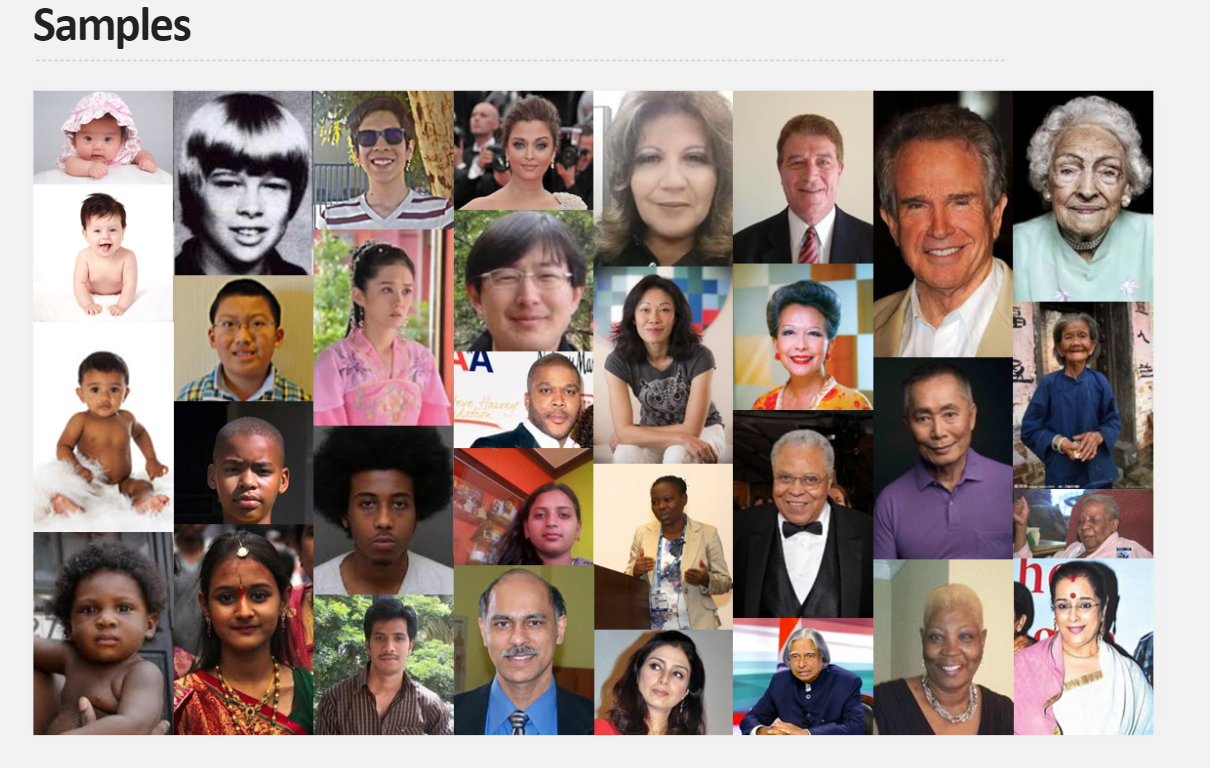

Before preprocessing and exploring the data  we will load **essential modules** like NumPy, Pandas, and TensorFlow.

In [2]:
# General
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data
import plotly.express as px
import matplotlib.pyplot as plt

# Data Preprocessing
import tensorflow.data as tfds
from sklearn.model_selection import train_test_split
# for the final model , the libraries we need will be decided on a later stage
# here we will load and study our dataset
# we have utilized a dataset from kaggle: https://www.kaggle.com/datasets/jangedoo/utkface-new/code

# **Loading The Data** 

**UTK Face**

About Dataset
UTKFace dataset is a large-scale face dataset with long age span **(range from 0 to 116 years old)**. The dataset consists of over **20,000 face images** with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be **used on a variety of tasks**, e.g., **face detection, age estimation, age progression/regression, landmark localization, etc.**

https://susanqq.github.io/UTKFace/

Total img  : 23708
sample image path      : 23_1_0_20170112234220808.jpg.chip.jpg
sample's age              : 23
sample's gender           : Female



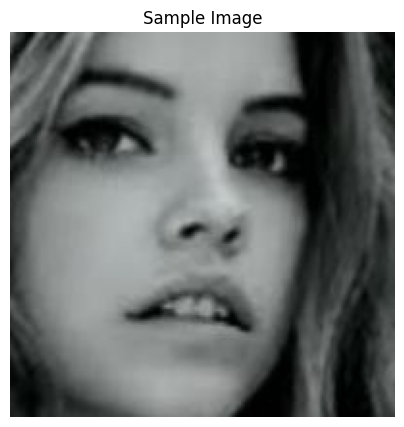

In [6]:
# here we will generate a random image from the dataset 

dir_path = "/kaggle/input/utkface-new/UTKFace/"
image_paths = os.listdir(dir_path)

gender_mapping = ["Male", "Female"]

# Choose and load an image randomly
rand_image_path = np.random.choice(image_paths)
rand_image = plt.imread(dir_path + rand_image_path)/255.
sample_age, sample_gender, *_ = rand_image_path.split("_")

print(f"Total img  : {len(image_paths)}")
print(f"sample image path      : {rand_image_path}")
print(f"sample's age              : {sample_age}")
print(f"sample's gender           : {gender_mapping[int(sample_gender)]}\n")

# print the image
plt.figure(figsize = (5,5))
plt.title("Sample Image")
plt.imshow(rand_image)
plt.axis("off")
plt.show()

# **IMPORTANT POINT**
The structure of the **image path**,there is age and gender—where the first part signifies age and the second denotes gender **(0 for male, 1 for female)** provides crucial information for subsequent analysis and categorization.

Careful management of these paths will facilitate targeted data processing based on age and gender attributes.

In [10]:
male_count = 0

ages = []

# Loop over the paths and check for male images.
for path in image_paths:
    path_split = path.split("_")
    if "0" == path_split[1]:
        male_count += 1
    ages.append(int(path_split[0]))

# find total female counts by subtracting from male counts
female_count = len(image_paths) - male_count

# Visualization
pie_chart = px.pie(
    names = gender_mapping,
    values = [male_count, female_count],
    hole = 0.4,
    title = "Gender Distribution Donut Chart",
    height = 500
)
pie_chart.show()

**Afte loading and understanding the data we observe that there are more number of males than females int the dataset**